In [12]:
from scipy.spatial import distance

class DBSCAN:
    def __init__(self, eps=0.5, min_pts=5, metric='euclidean'):
        self.eps = eps
        self.min_pts = min_pts
        if metric == 'cityblock':
            self.metric = 'cityblock'
        else:
            self.metric = 'euclidean'
            
    def clust(self, m_adjacency, core_point, idx, clust_num):
        queue = m_adjacency[idx]
        result = []
        while (len(queue) != 0):
            curr = queue[0]
            if self.label[curr] == -1:
                self.label[curr] = clust_num
                result.append(curr)
                if curr in core_point:
                    queue.extend(m_adjacency[curr])
            del queue[0]
        return result
        
    def fit(self, data):
        if not self.eps > 0.0:
            raise ValueError("eps must be positive")
        
        # define adjacency matrix & core point
        m_adjacency = []
        core_point = []
        for i in range(len(data)):
            dist = distance.cdist([data[i]], data, self.metric)
            temp = []
            for j in range(len(dist[0])):
                if (dist[0][j] <= self.eps):
                    temp.append(j)
            m_adjacency.append(temp)
            if (len(temp) >= self.min_pts):
                core_point.append(i)
        
        # clutering based on core point
        cluster_num = 1
        self.label = [-1] * len(data)
        result = []
        for i in range(len(core_point)):
            if (self.label[core_point[i]] == -1):
                temp_result = self.clust(m_adjacency, core_point, core_point[i], cluster_num)
                result.append(temp_result)
                cluster_num += 1
        return result

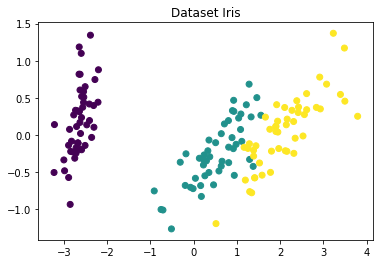

Label dataset iris hasil perhitungan:
[1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 2, -1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2, -1, 2, 3, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, 2, 2, -1, 2, -1, 2, 2, 2, -1, -1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 3, -1, -1, 3, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 3]


Daftar keanggotaan seluruh cluster:
[[0, 4, 7, 17, 19, 27, 28, 39, 40, 46, 49, 21, 48, 9, 11, 25, 26, 34, 35, 37, 44, 10, 36, 1, 2, 47, 3, 12, 30, 24, 29, 23, 43, 45, 38, 42, 6, 8, 13], [88, 94, 95, 96, 99, 55, 89, 90, 67, 71, 82, 92, 53, 69], [70, 123, 126, 127, 138, 149]]


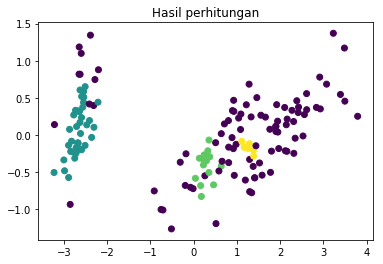

In [17]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

iris_dataset = datasets.load_iris()
iris_data = iris_dataset.data
iris_target = iris_dataset.target

pca = PCA(n_components=2)
pca.fit(iris_data)
iris_pca = pca.transform(iris_data)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=iris_target)
plt.title("Dataset Iris")
plt.show()

dbscan = DBSCAN(metric='cityblock')
result = dbscan.fit(iris_data)
print("Label dataset iris hasil perhitungan:")
print(dbscan.label)
print("\n")
print("Daftar keanggotaan seluruh cluster:")
print(result)

pca = PCA(n_components=2)
pca.fit(iris_data)
iris_pca = pca.transform(iris_data)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=dbscan.label)
plt.title("Hasil perhitungan")
plt.show()

In [11]:
m = [[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]]
coba = DBSCAN(eps=2, min_pts=2)
result = coba.fit(m)
print(coba.label)
print(result)

[-1, -1, 1, 2, 1, 1, -1, 2]
[[2, 4, 5], [3, 7]]
